## Scraping data from Reddit

In [1]:
import praw
import pandas as pd
from tqdm.notebook import tqdm
import json
# import os

In [2]:
f = open("client_secrets.json")
data = json.load(f)

client_id = data["client_id"]
client_secret = data["client_secret"]
password = data["password"]

f.close()

reddit = praw.Reddit(
    client_id = client_id,
    client_secret = client_secret,
    password = password,
    redirect_uri = "http://localhost:8080",
    user_agent = "script by u/AppleFar",
    username = "AppleFar",
)
print(reddit.user.me()) # to check if the authorisation worked
# reddit.read_only = True

AppleFar


In [3]:
def scrape_reddit_posts(subreddit, limit=None):
    data = []
    submissions = reddit.subreddit(subreddit).hot(limit=limit)
    for submission in tqdm(submissions, total=limit):
        post_id = submission.id
        post_title = submission.title
        post_body = submission.selftext
        # author_id = None if submission.author == None else submission.author.id
        post_flair = submission.link_flair_text
        nsfw = submission.over_18
        post_created_utc = submission.created_utc
        post_url = submission.url
        # data.append([subreddit, post_id, post_title, post_body, author_id, post_flair, nsfw, post_created_utc, post_url])
        data.append([subreddit, post_id, post_title, post_body, post_flair, nsfw, post_created_utc, post_url])
    return data

In [1]:
subreddits = ["autism", "aspergers", "AutismInWomen", "AutismTranslated", "AutisticAdults", "AutisticPride", 
              "aspergirls", "AskAutism", "autism_controversial", "AutismCertified",
              "TrueEvilAutism", "AutisticPeeps", "SpicyAutism", "autismlevel2and3", "AutisticLiberation", "Autism_Pride"]

print(len(subreddits))

16


In [4]:
subreddits = ["autism", "aspergers", "AutismInWomen", "AutismTranslated", "AutisticAdults", "AutisticPride", 
              "aspergirls", "AskAutism", "autism_controversial", "AutismCertified",
              "TrueEvilAutism", "AutisticPeeps", "SpicyAutism", "autismlevel2and3", "AutisticLiberation", "Autism_Pride"] # add more subreddits
# flairs = ["", "Recommendation", "", "Please Recommend Suitable Podcasts"]
num_redditors = 1001
results = []

for subreddit in subreddits:
    print("subreddit: ", subreddit)
    try:
        results += scrape_reddit_posts(subreddit, num_redditors)
    except Exception as error:
        print(error)
# df = pd.DataFrame(results, columns = ["subreddit", "post_id", "post_title", "post_body", "author_id", "post_flair", "nsfw", "post_created_utc", "post_url"])
df = pd.DataFrame(results, columns = ["subreddit", "post_id", "post_title", "post_body", "post_flair", "nsfw", "post_created_utc", "post_url"])
df.to_excel("../Data/Reddit_Data_raw.xlsx", index=False)

subreddit:  autism


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  aspergers


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AutismInWomen


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AutismTranslated


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AutisticAdults


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AutisticPride


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  aspergirls


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AskAutism


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  autism_controversial


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AutismCertified


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  TrueEvilAutism


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AutisticPeeps


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  SpicyAutism


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  autismlevel2and3


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  AutisticLiberation


  0%|          | 0/1001 [00:00<?, ?it/s]

subreddit:  Autism_Pride


  0%|          | 0/1001 [00:00<?, ?it/s]

In [5]:
df.head()

,subreddit,post_id,post_title,post_body,post_flair,nsfw,post_created_utc,post_url
0,autism,ub3skp,Let’s talk about ABA therapy. ABA posts outsid...,ABA (Applied Behavior Analysis) therapy is one...,None,False,1.650833e+09,https://www.reddit.com/r/autism/comments/ub3sk...
1,autism,1btry4o,We're looking to expand the moderation team to...,Exactly what the title says - more moderators ...,General/Various,False,1.712040e+09,https://www.reddit.com/r/autism/comments/1btry...
2,autism,1btxrwl,Do you scream on roller coasters?,I just found out people scream involuntarily o...,Question,False,1.712062e+09,https://www.reddit.com/r/autism/comments/1btxr...
3,autism,1btu8w8,Anyone else really hates using other people´s ...,I don´t know why but i really dislike using pe...,Question,False,1.712050e+09,https://www.reddit.com/r/autism/comments/1btu8...
4,autism,1bu4gpu,I am an autistic teacher,"I get over stimulated, I get upset, sometimes ...",Educator,False,1.712079e+09,https://www.reddit.com/r/autism/comments/1bu4g...


In [6]:
len(df)

11233

## Extracting queries

In [1]:
import pandas as pd
# import nltk
# from nltk.corpus import stopwords


# nltk.download('stopwords')
# stopwords = stopwords.words('english')

reddit_data = pd.read_excel("../Data/Reddit_Data_raw.xlsx")
print(len(reddit_data))
reddit_data = reddit_data.loc[reddit_data['post_body'].notna() | reddit_data['post_title'].notna()]
print(len(reddit_data))

11233
11233


In [115]:
# import re
# from keybert import KeyBERT
# from keyphrase_vectorizers import KeyphraseCountVectorizer
# from nltk.tokenize import sent_tokenize

# test_texts = ["Hello my name is Hrishita. I have a lot of things to say.", "But for this test let's stick to some basic sentences.", "I hope this works but I am not very optimistic.", "Autism is a rather complex disorder so talking about it and extracting keywords from it is quite the challenging task.", "Autistic people also often report comorbidity with anxiety, AuDHD, and other mental health issues.", "I collected data from subreddits like r/Autism and r/Aspergers but x#200b there is a lot to be done before the 20th."]

# test_text = "Autism's a rather complex disorder so talking about it and extracting keywords from it is quite the challenging task!!! Autistic people also often report comorbidity with anxiety, AuDHD, and other mental health issues..... I collected data from subreddits like r/Autism and r/Aspergers but x#200b there is a lot to be done before the 20th."

# text = re.sub(r'http\S+', '', test_text) # remove URLs
# text = re.sub(r'r\/\S+', '', text) # remove subreddit names
# text = re.sub(r'\d+\S+', '', text) # remove number related words (dates, time, etc)
# test_text = re.sub(r'\d+', '', text) # remove numbers

# kw_model = KeyBERT()
# result = kw_model.extract_keywords(docs=sent_tokenize(test_text), vectorizer=KeyphraseCountVectorizer())
# # print(result)
# for sentence in result:
#     if sentence != []:
#         print("\n", sentence)
#         for phrase in sentence:
#             print(phrase[0])


 [('autism', 0.5697), ('challenging task', 0.3531), ('keywords', 0.3471), ('complex disorder', 0.2433)]
autism
challenging task
keywords
complex disorder

 [('autistic people', 0.6665), ('other mental health issues', 0.5014), ('anxiety', 0.4349), ('comorbidity', 0.3663), ('audhd', 0.3295)]
autistic people
other mental health issues
anxiety
comorbidity
audhd

 [('subreddits', 0.4706), ('data', 0.4349), ('lot', 0.2145)]
subreddits
data
lot


In [ ]:
from keybert import KeyBERT
from keyphrase_vectorizers import KeyphraseCountVectorizer
from nltk.tokenize import sent_tokenize

text = "Can anyone explain this? This is a trial text. *** I consist of multiple sentences to check the POS tagging of the chosen model. I hope this works well for Hrishita's thesis!"
kw_model = KeyBERT()
result = kw_model.extract_keywords(sent_tokenize(text), vectorizer=KeyphraseCountVectorizer())

In [2]:
# import contractions
# import re
# from nltk.tokenize import word_tokenize
# from nltk import pos_tag

import spacy
import re
# import nltk
from nltk.tokenize import sent_tokenize
from keybert import KeyBERT
from keyphrase_vectorizers import KeyphraseCountVectorizer

from tqdm.notebook import tqdm

nlp = spacy.load("en_core_web_sm")

# text = nlp("Can anyone explain this? This is a trial text. *** I consist of multiple sentences to check the POS tagging of the chosen model. I hope this works well for Hrishita's thesis!")

def check_is_stop(text):
    if len(text.split()) == 1:
        for word in nlp(text):
            if word.is_stop == True:
                return True
    return False

def extract_noun_chunks(text):
    text = re.sub(r'r\/\S+', '', text) # remove subreddit names
    text = re.sub(r'http\S+', '', text) # remove URLs
    # text = re.sub(r'x\d+b', '', text) # remove escape sequences
    # text = re.sub(r'x\d+B', '', text) # remove escape sequences
    text = re.sub(r'\d+\S+', '', text) # remove number related words (dates, time, etc)
    text = re.sub(r'\d+', '', text) # remove numbers
    text = '\n'.join([chunk.text for chunk in nlp(text).noun_chunks if check_is_stop(chunk.text)==False])
    # text = text.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+“”"}) # remove special characters
    # text = ' '.join([word.text for word in nlp(text) if word.is_stop == False])
    return text

    # text = text.lower()
    # text = contractions.fix(text) # expand contractions
    # text = re.sub(r'http\S+', '', text) # remove URLs
    # text = re.sub(r'r\/\S+', '', text) # remove subreddit names
    # text = nlp(text)
    # text = ' '.join([word.text for word in text if word.is_stop != True])
    # text = nlp(text)
    # noun_chunks = ""
    # for chunk in text.noun_chunks:
    #     noun_chunks.append(chunk.text)
    # return " ".join(noun_chunks)
    
    # pos_tags = pos_tag(word_tokenize(text))
    # words = [word for (word, tag) in pos_tags if tag.startswith(('NN', 'JJ', 'RB'))]
    # text = ' '.join(words)
    
    # text = ' '.join([word for word in word_tokenize(text) if word not in stopwords]) # remove stopwords
    
    # return text

def extract_keyphrases(original_text):
    text = re.sub(r'http\S+', '', original_text) # remove URLs
    text = re.sub(r'r\/\S+', '', text) # remove subreddit names
    text = re.sub(r'\d+\S+', '', text) # remove number related words (dates, time, etc)
    text = re.sub(r'\d+', '', text) # remove numbers
    kw_model = KeyBERT()
    try:
        result = kw_model.extract_keywords(sent_tokenize(text), vectorizer=KeyphraseCountVectorizer())
        extracted_phrases = []
        for sentence in result:
            if sentence != []:
                # print("\n", sentence)
                for phrase in sentence:
                    try:
                        extracted_phrases.append(str(phrase[0]))
                    except:
                        continue
        return '\n'.join(extracted_phrases)
    except:
        print("\n", original_text, text)
        return None
        # return extract_noun_chunks(text)

noun_chunks = []
for title, post in tqdm(zip(reddit_data["post_title"], reddit_data["post_body"]), total=len(reddit_data)):
    if title != None and post!=None:
        text = str(title) + ". " + str(post)
    elif title != None:
        text = str(title)
    elif post != None:
        text = str(post)
    # noun_chunks.append(extract_noun_chunks(text))
    noun_chunks.append(extract_keyphrases(text))
    
reddit_data["noun_chunks"] = noun_chunks
reddit_data.to_excel("../Data/Reddit_Data_processed_2.xlsx", index = False)

  0%|          | 0/11233 [00:00<?, ?it/s]


 How do I know if I'm artistic. Wondering how I know if I'm artistic How do I know if I'm artistic. Wondering how I know if I'm artistic

 Feeling sad, just reaching out.. ☝️ Feeling sad, just reaching out.. ☝️

 How old do you feel like you actually are?. . How old do you feel like you actually are?. .

 Why do some autistic feel so hollow. why?

just why Why do some autistic feel so hollow. why?

just why

 What happened to r/autisticpeeps. I don’t see it anymore. And then I found it but it says set to private? What does this mean? Why can I not be in it anymore? Or how can I still be apart of it if it is set to private? What happened to  I don’t see it anymore. And then I found it but it says set to private? What does this mean? Why can I not be in it anymore? Or how can I still be apart of it if it is set to private?

 I love this. https://www.tiktok.com/t/ZT8mfh5EU/ I love this. 

 I hate being socially inept and paranoid. Ugh i was going to write more but I don't feel like it an

In [3]:
import pandas as pd

reddit_data = pd.read_excel("../Data/Reddit_Data_processed_2.xlsx")
print(len(reddit_data))
reddit_data = reddit_data.loc[reddit_data['noun_chunks'].notna()]
print(len(reddit_data))

11233
11134


In [4]:
from collections import Counter
import pandas as pd

reddit_data = pd.read_excel("../Data/Reddit_Data_processed_2.xlsx")
reddit_data = reddit_data.dropna()

noun_chunks = []
unique_noun_chunks_per_post = []

for _, row in reddit_data.iterrows():
    noun_chunks += list([chunk for chunk in str(row["noun_chunks"]).split("\n") if len(chunk)>1])
    unique_noun_chunks_per_post += list(set([chunk for chunk in str(row["noun_chunks"]).split("\n") if len(chunk)>1]))

ngram_counts = Counter(noun_chunks)
chunks_count= dict()
post_count = dict()
chunks_forms = dict()
for chunk, count in ngram_counts.most_common():
    key = chunk.lower()
    chunks_count[key] = chunks_count.get(key,0) + count
    chunks_forms[key] = list(chunks_forms.get(key, [])) + [chunk]
    chunks_forms[key] = set(chunks_forms[key])

post_counter = Counter(unique_noun_chunks_per_post)
post_count_keeper = dict()
for chunk, count in post_counter.most_common():
    key = chunk.lower()
    post_count_keeper[key] = post_count_keeper.get(key, 0) + count


In [5]:
queries = []
for key in chunks_count.keys():
    query = key
    count = chunks_count[key]
    post_num = post_count_keeper[key]
    length = len(query.split())
    forms = chunks_forms[key]

    queries.append([query, length, count, post_num, forms])

df = pd.DataFrame(queries, columns=["query", "ngram", "num_occur", "num_posts", "forms"])
df.to_excel("../Data/CollectedQueries_2.xlsx", index=False)

## Merging similar queries

In [40]:
import pandas as pd

queries = pd.read_excel("../Data/CollectedQueries_2.xlsx")
queries["forms"] = queries["forms"].apply(eval)
queries = queries.sort_values(ascending=False, by='num_posts')
queries.head()

,query,ngram,num_occur,num_posts,forms
0,people,1,2866,1344,{people}
1,autism,1,2512,1222,{autism}
2,anyone,1,1518,1207,{anyone}
4,something,1,1302,951,{something}
3,things,1,1417,871,{things}


In [41]:
from pattern.text.en import singularize
from tqdm.notebook import tqdm
    
result = dict()
for _, row in tqdm(queries.iterrows(), total=len(queries)):
    key = singularize(row['query'])
    if key in result.keys():
        result[key]["num_occur"] += row["num_occur"]
        result[key]["num_posts"] += row["num_posts"]
        result[key]["forms"].add(row["query"])
    else:
        result[key] = dict()
        result[key]["ngram"] = row["ngram"]
        result[key]["num_occur"] = row["num_occur"]
        result[key]["num_posts"] = row["num_posts"]
        result[key]["forms"] = row["forms"]

  0%|          | 0/31322 [00:00<?, ?it/s]

In [43]:
df_results = []

for key, value in result.items():
    query = str(key)
    ngram = value["ngram"]
    num_occur = value["num_occur"]
    num_posts = value["num_posts"]
    forms = value["forms"]
    if len(value["forms"])==1: # some words were being singularized by removing the 's' at the end although the word is singular already (eg: diagnosis -> diagnosi)
            temp = list(value["forms"])
            query = temp[0]
    df_results.append([query, ngram, num_occur, num_posts, forms])

df = pd.DataFrame(df_results, columns=["query", "ngram", "num_occur", "num_posts", "forms"])
df.to_excel("../Data/CollectedQueries_3.xlsx", index=False)
df.head()

,query,ngram,num_occur,num_posts,forms
0,person,1,3425,1696,"{people, person, persons}"
1,autism,1,2512,1222,{autism}
2,anyone,1,1518,1207,{anyone}
3,something,1,1304,953,"{somethings, something}"
4,thing,1,1761,1130,"{things, thing}"


In [44]:
print(len(queries), len(df))

31322 28846


## Cosine Similarity

### Cosine Similarity using Sentence Transformers

In [2]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

queries = pd.read_excel("../Data/CollectedQueries_3.xlsx")
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [4]:
# unigrams = queries.loc[queries["ngram"]==1]
# unigrams = unigrams.reset_index(drop=True)
# sentences = unigrams["query"]
# embeddings = model.encode(sentences)
# util.cos_sim(embeddings[0], embeddings[1])

In [3]:
from tqdm.notebook import tqdm

for n in range(5,0,-1):
    similarity = []
    if n < 5:
        ngrams = queries.loc[queries["ngram"]==n]
    else:
        ngrams = queries.loc[queries["ngram"]>=n]
    ngrams = ngrams.reset_index(drop=True)
    sentences = ngrams["query"]
    embeddings = model.encode(sentences)
    print("Calculating pairwise cosine similarity for {} gram queries...".format(n))
    for i in tqdm(range(len(sentences)-1)):
        for j in range(i+1, len(sentences)):
            sentence1 = sentences[i]
            sentence2 = sentences[j]
            cos_similarity = float(util.cos_sim(embeddings[i], embeddings[j])[0][0])
            cos_similarity = round(cos_similarity, 2)
            similarity.append([sentence1, sentence2, cos_similarity])
    result_df = pd.DataFrame(similarity, columns = ["query1", "query2", "cos_sim"])
    result_df.to_csv("../Data/cos_similarity/sentence_transformers/cos_similarity_{}_gram.csv".format(n), index=False)
    print("Pairwise Cosine similarity for {} gram queries complete!".format(n))

Calculating pairwise cosine similarity for 5 gram queries...


  0%|          | 0/43 [00:00<?, ?it/s]

Pairwise Cosine similarity for 5 gram queries complete!
Calculating pairwise cosine similarity for 4 gram queries...


  0%|          | 0/398 [00:00<?, ?it/s]

Pairwise Cosine similarity for 4 gram queries complete!
Calculating pairwise cosine similarity for 3 gram queries...


  0%|          | 0/3877 [00:00<?, ?it/s]

Pairwise Cosine similarity for 3 gram queries complete!
Calculating pairwise cosine similarity for 2 gram queries...


  0%|          | 0/17696 [00:00<?, ?it/s]

Pairwise Cosine similarity for 2 gram queries complete!
Calculating pairwise cosine similarity for 1 gram queries...


  0%|          | 0/6827 [00:00<?, ?it/s]

Pairwise Cosine similarity for 1 gram queries complete!


In [210]:
import pandas as pd

# higher than cos_sim 0.75 makes sense 
cossim_unigram = pd.read_csv("../Data/cos_similarity/sentence_transformers/cos_similarity_1_gram.csv")
cossim_bigram = pd.read_csv("../Data/cos_similarity/sentence_transformers/cos_similarity_2_gram.csv")
cossim_trigram = pd.read_csv("../Data/cos_similarity/sentence_transformers/cos_similarity_3_gram.csv")
cossim_quadgram = pd.read_csv("../Data/cos_similarity/sentence_transformers/cos_similarity_4_gram.csv")
cossim_ngram = pd.read_csv("../Data/cos_similarity/sentence_transformers/cos_similarity_5_gram.csv")

In [212]:
print(len(cossim_unigram))
print(len(cossim_unigram.loc[cossim_unigram["cos_sim"]>=0.75]))

23307378
1384


In [18]:
print(len(cossim_bigram))
cossim_bigram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

156583056


0.25    0.10
0.50    0.14
0.75    0.20
0.90    0.25
0.95    0.29
Name: cos_sim, dtype: float64

In [19]:
print(len(cossim_trigram))
cossim_trigram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

7517503


0.25    0.05
0.50    0.11
0.75    0.17
0.90    0.24
0.95    0.29
Name: cos_sim, dtype: float64

In [20]:
print(len(cossim_quadgram))

cossim_quadgram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

79401


0.25    0.03
0.50    0.09
0.75    0.16
0.90    0.24
0.95    0.30
Name: cos_sim, dtype: float64

In [22]:
print(len(cossim_ngram))
cossim_ngram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

946


0.25    0.0300
0.50    0.0800
0.75    0.1400
0.90    0.2400
0.95    0.3075
Name: cos_sim, dtype: float64

### Cosine Similarity using SpaCy

In [207]:
# import spacy
# nlp = spacy.load("en_core_web_lg")
# #nlp = spacy.load("en_core_web_md")


# doc1 = nlp(u'happy autism awareness day')
# doc2 = nlp(u'autism awareness day')
# doc3 = nlp(u'the boy wear red T-shirt')


# print(doc1.similarity(doc2)) 
# print(doc1.similarity(doc3))
# print(doc2.similarity(doc3)) 

0.9504426473269242
0.169267745848091
0.1869422100993208


In [208]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_lg")

queries = pd.read_excel("../Data/FinalQueries.xlsx")

In [209]:
from tqdm.notebook import tqdm

for n in range(5,0,-1):
    similarity = []
    if n < 5:
        ngrams = queries.loc[queries["ngram"]==n]
    else:
        ngrams = queries.loc[queries["ngram"]>=n]
    ngrams = ngrams.reset_index(drop=True)
    sentences = ngrams["query"]
    print("Calculating pairwise cosine similarity for {} gram queries...".format(n))
    for i in tqdm(range(len(sentences)-1)):
        for j in range(i+1, len(sentences)):
            sentence1 = nlp(sentences[i])
            sentence2 = nlp(sentences[j])
            cos_similarity = float(sentence1.similarity(sentence2))
            cos_similarity = round(cos_similarity, 2)
            similarity.append([sentences[i], sentences[j], cos_similarity])
    result_df = pd.DataFrame(similarity, columns = ["query1", "query2", "cos_sim"])
    result_df.to_csv("../Data/cos_similarity/spacy/cos_similarity_{}_gram.csv".format(n), index=False)
    print("Pairwise Cosine similarity for {} gram queries complete!".format(n))

Calculating pairwise cosine similarity for 5 gram queries...


  0%|          | 0/7 [00:00<?, ?it/s]

Pairwise Cosine similarity for 5 gram queries complete!
Calculating pairwise cosine similarity for 4 gram queries...


  0%|          | 0/15 [00:00<?, ?it/s]

Pairwise Cosine similarity for 4 gram queries complete!
Calculating pairwise cosine similarity for 3 gram queries...


  0%|          | 0/241 [00:00<?, ?it/s]

Pairwise Cosine similarity for 3 gram queries complete!
Calculating pairwise cosine similarity for 2 gram queries...


  0%|          | 0/3416 [00:00<?, ?it/s]

C:\Users\Hrishita Chakrabarti\AppData\Local\Temp\ipykernel_14028\2222323578.py:16: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  cos_similarity = float(sentence1.similarity(sentence2))


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# higher than cos_sim 0.75 makes sense 
cossim_unigram = pd.read_csv("../Data/cos_similarity/spacy/cos_similarity_1_gram.csv")
cossim_bigram = pd.read_csv("../Data/cos_similarity/spacy/cos_similarity_2_gram.csv")
cossim_trigram = pd.read_csv("../Data/cos_similarity/spacy/cos_similarity_3_gram.csv")
cossim_quadgram = pd.read_csv("../Data/cos_similarity/spacy/cos_similarity_4_gram.csv")
cossim_ngram = pd.read_csv("../Data/cos_similarity/spacy/cos_similarity_5_gram.csv")

In [ ]:
print(len(cossim_unigram))
cossim_unigram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

23307378


0.25    0.17
0.50    0.21
0.75    0.26
0.90    0.31
0.95    0.34
Name: cos_sim, dtype: float64

In [ ]:
print(len(cossim_bigram))
cossim_bigram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

156583056


0.25    0.10
0.50    0.14
0.75    0.20
0.90    0.25
0.95    0.29
Name: cos_sim, dtype: float64

In [ ]:
print(len(cossim_trigram))
cossim_trigram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

7517503


0.25    0.05
0.50    0.11
0.75    0.17
0.90    0.24
0.95    0.29
Name: cos_sim, dtype: float64

In [ ]:
print(len(cossim_quadgram))

cossim_quadgram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

79401


0.25    0.03
0.50    0.09
0.75    0.16
0.90    0.24
0.95    0.30
Name: cos_sim, dtype: float64

In [ ]:
print(len(cossim_ngram))
cossim_ngram["cos_sim"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])

946


0.25    0.0300
0.50    0.0800
0.75    0.1400
0.90    0.2400
0.95    0.3075
Name: cos_sim, dtype: float64

## Selecting Final Queries

In [1]:
import pandas as pd

queries = pd.read_excel("../Data/CollectedQueries_3.xlsx")
queries["forms"] = queries["forms"].apply(eval)
print(len(queries))
queries.head()

28846


,query,ngram,num_occur,num_posts,forms
0,person,1,3425,1696,"{person, persons, people}"
1,autism,1,2512,1222,{autism}
2,anyone,1,1518,1207,{anyone}
3,something,1,1304,953,"{something, somethings}"
4,thing,1,1761,1130,"{things, thing}"


In [2]:
import nltk
from nltk.corpus import stopwords
import spacy


nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words
# print(len(spacy_stopwords))
 
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

nlp.Defaults.stop_words|= nltk_stopwords
# print(len(spacy_stopwords))

def check_if_stop(text):
    for word in nlp(text):
        if word.is_stop == True:
            return True
    return False

queries = queries.sort_values(ascending=True, by='ngram')
idxs = []
for idx, row in queries.iterrows():
    if row["ngram"] != 1:
        break
    elif check_if_stop(row["query"]) == True:
        idxs.append(idx)

queries = queries.drop(idxs)
queries = queries.reset_index(drop=True)
print(len(queries))

c:\Users\Hrishita Chakrabarti\anaconda3\envs\WebAccessibility\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\Users\Hrishita Chakrabarti\anaconda3\envs\WebAccessibility\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
[nltk_data] Downloading package stopwords to C:\Users\Hrishita
[nltk_data]     Chakrabarti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


28784


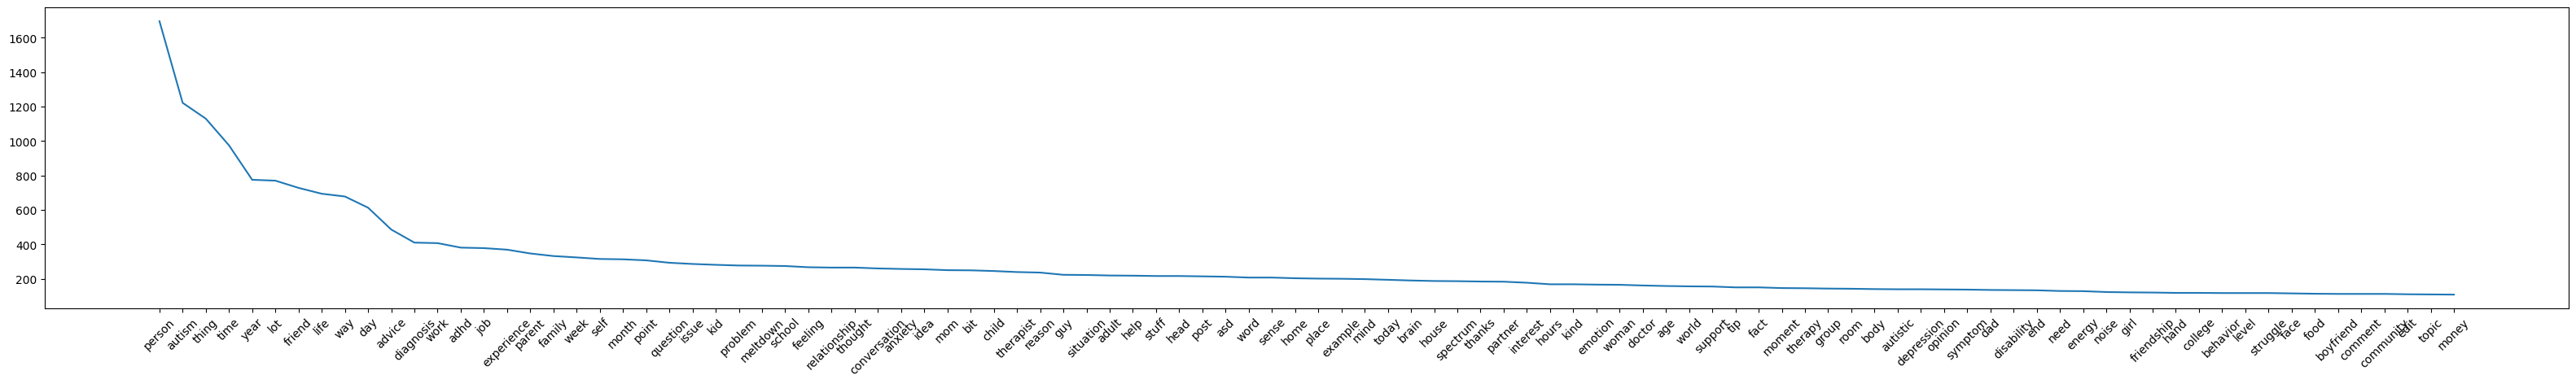

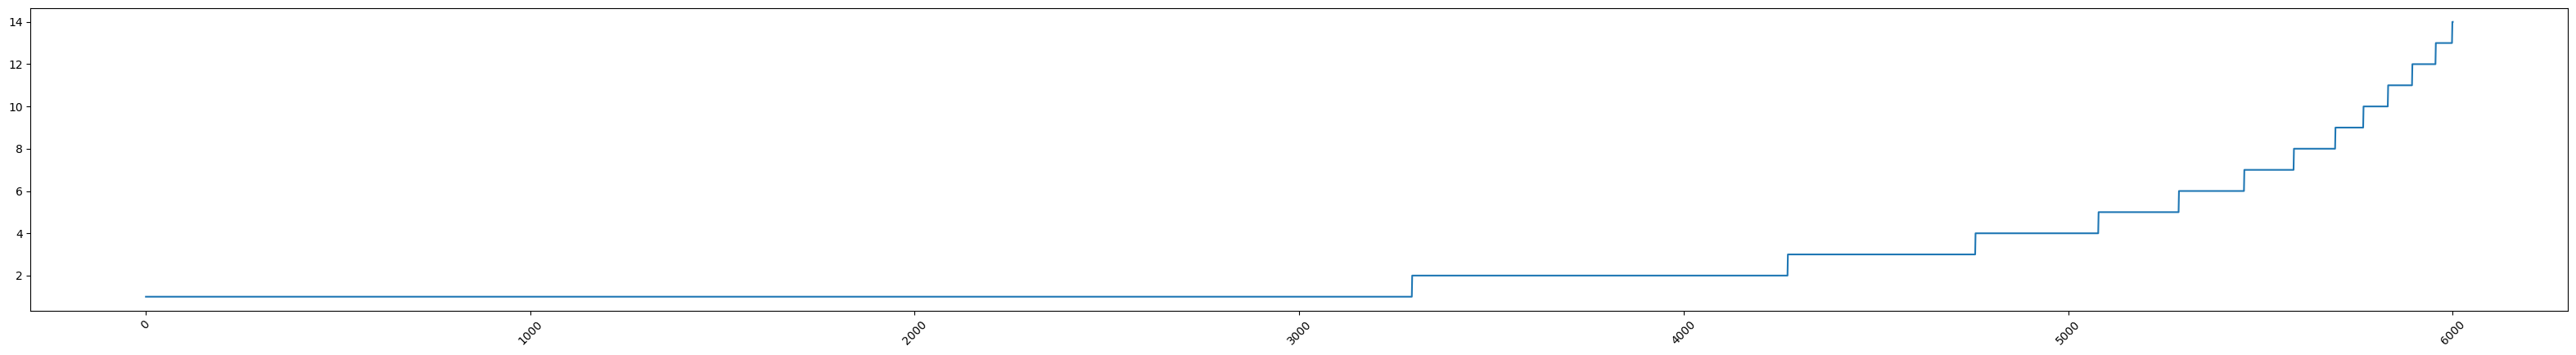

In [3]:
import matplotlib.pyplot as plt

# determining upper limit

queries = queries.sort_values(ascending=False, by='num_posts')
unigrams = queries.loc[queries['ngram']==1]
# print(len(unigrams))
df = unigrams.head(100)
# df = unigrams

plt.figure().set_figwidth(40)
plt.plot(df["query"], df["num_posts"])
# plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Frequency of 100 most common keywords (unigrams) - total number: {}".format(len(unigrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/unigram_freq_desc.pdf", dpi=300, bbox_inches='tight')
plt.show()

# determining lower limit

queries = queries.sort_values(ascending=True, by='num_posts')
unigrams = queries.loc[queries['ngram']==1]
# print(len(unigrams))
df = unigrams.head(6000)
# df = unigrams

plt.figure().set_figwidth(40)
# plt.plot(df["query"], df["num_posts"])
plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Ascending order of Frequency of keywords (unigrams) - total number: {}".format(len(unigrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/unigram_freq_asc.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
removed_unigrams = unigrams.loc[unigrams["num_posts"]>=400]
print(removed_unigrams)

          query  ngram  num_occur  num_posts                      forms
6596       work      1        797        407              {work, works}
6613  diagnosis      1        814        410                {diagnosis}
6554     advice      1        628        486          {advices, advice}
6580        day      1        820        613                {days, day}
6493        way      1        888        678                {way, ways}
6485       life      1       1107        694       {lifes, lives, life}
6562     friend      1       1299        728          {friend, friends}
6506        lot      1        982        770                {lot, lots}
6602       year      1        981        775              {years, year}
6536       time      1       1499        975              {times, time}
6540      thing      1       1761       1130            {things, thing}
6639     autism      1       2512       1222                   {autism}
0        person      1       3425       1696  {person, persons, 

In [34]:
dedicated_unigrams = ["autism", "diagnosis", "work"]
dedicated_unigrams_df = unigrams.loc[unigrams["query"].isin(dedicated_unigrams)]

final_unigrams = unigrams.loc[unigrams["num_posts"]>1].loc[unigrams["num_posts"]<400]

final_unigrams_list = pd.concat([final_unigrams, dedicated_unigrams_df], ignore_index=True)
final_unigrams_list = final_unigrams_list.sort_values(ascending=False, by="num_posts").reset_index(drop=True)

print(len(unigrams), len(final_unigrams_list))
final_unigrams_list.head()

6766 3463


,query,ngram,num_occur,num_posts,forms
0,autism,1,2512,1222,{autism}
1,diagnosis,1,814,410,{diagnosis}
2,work,1,797,407,"{works, work}"
3,adhd,1,614,381,{adhd}
4,job,1,692,378,"{job, jobs}"


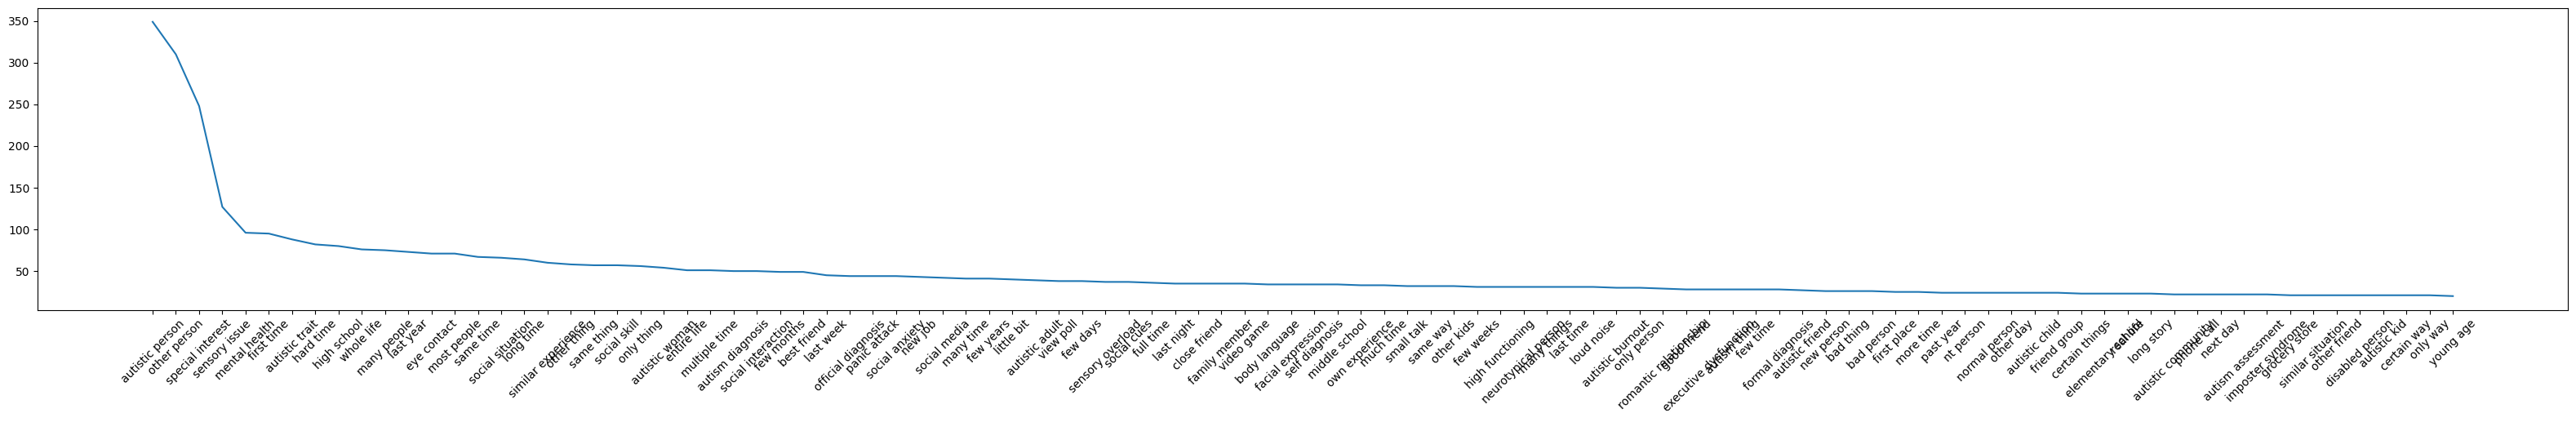

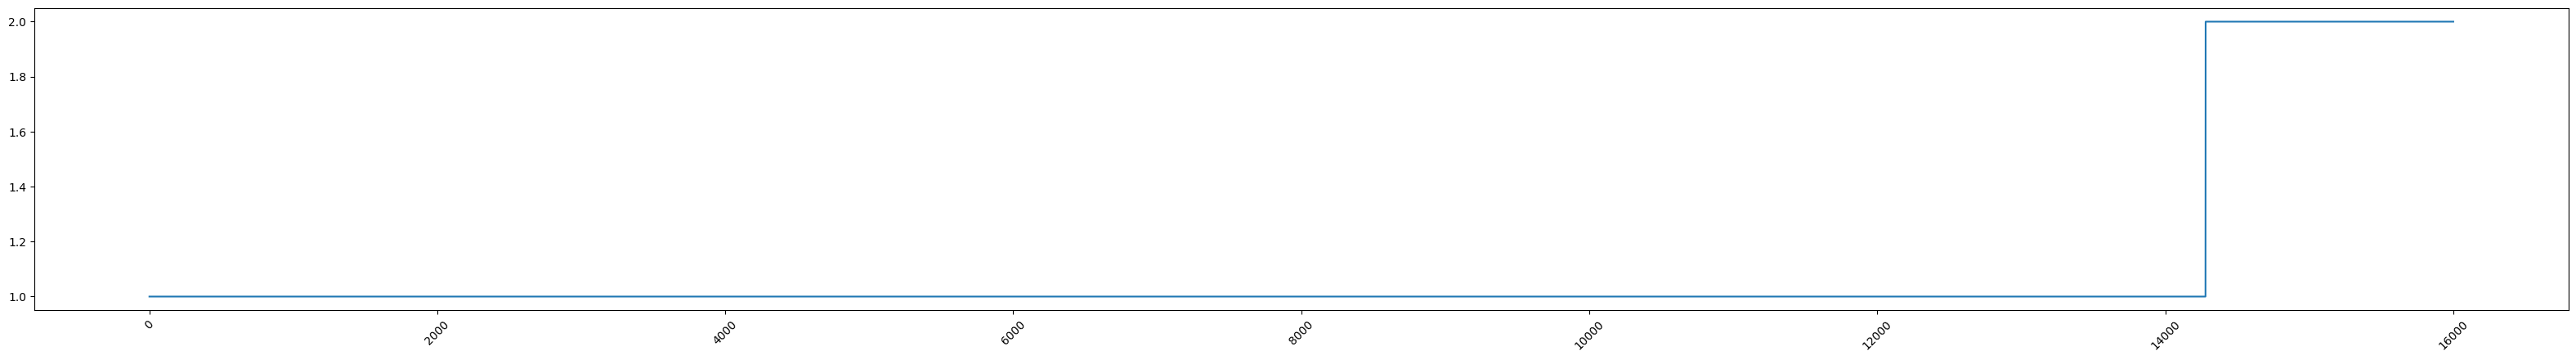

In [5]:
import matplotlib.pyplot as plt

# determining upper limit

queries = queries.sort_values(ascending=False, by='num_posts')
bigrams = queries.loc[queries['ngram']==2]
# print(len(unigrams))
df = bigrams.head(100)
# df = unigrams

plt.figure().set_figwidth(40)
plt.plot(df["query"], df["num_posts"])
# plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Frequency of 100 most common bigrams - total number: {}".format(len(bigrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/bigram_freq_desc.pdf", dpi=300, bbox_inches='tight')
plt.show()

# determining lower limit

queries = queries.sort_values(ascending=True, by='num_posts')
bigrams = queries.loc[queries['ngram']==2]
# print(len(unigrams))
df = bigrams.head(16000)
# df = unigrams

plt.figure().set_figwidth(40)
# plt.plot(df["query"], df["num_posts"])
plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Ascending order of Frequency of bigrams - total number: {}".format(len(bigrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/bigram_freq_asc.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
removed_bigrams = bigrams.loc[bigrams["num_posts"]>=100]
print(removed_bigrams)

                  query  ...                                              forms
12098     sensory issue  ...                    {sensory issue, sensory issues}
12179  special interest  ...              {special interest, special interests}
12631      other person  ...                       {other people, other person}
12641   autistic person  ...  {autistic people, autistic persons, autistic p...

[4 rows x 5 columns]


In [37]:
dedicated_bigrams = ["sensory issue", "special interest", "autistic person"]
dedicated_bigrams_df = bigrams.loc[bigrams["query"].isin(dedicated_bigrams)]

final_bigrams = bigrams.loc[bigrams["num_posts"]>1].loc[bigrams["num_posts"]<100]

final_bigrams_list = pd.concat([final_bigrams, dedicated_bigrams_df], ignore_index=True)
final_bigrams_list = final_bigrams_list.sort_values(ascending=False, by="num_posts").reset_index(drop=True)

print(len(bigrams), len(final_bigrams_list))
final_bigrams_list.head()

17697 3417


,query,ngram,num_occur,num_posts,forms
0,autistic person,2,486,349,"{autistic people, autistic persons, autistic p..."
1,special interest,2,372,248,"{special interest, special interests}"
2,sensory issue,2,150,127,"{sensory issue, sensory issues}"
3,mental health,2,123,96,{mental health}
4,first time,2,103,95,"{first times, first time}"


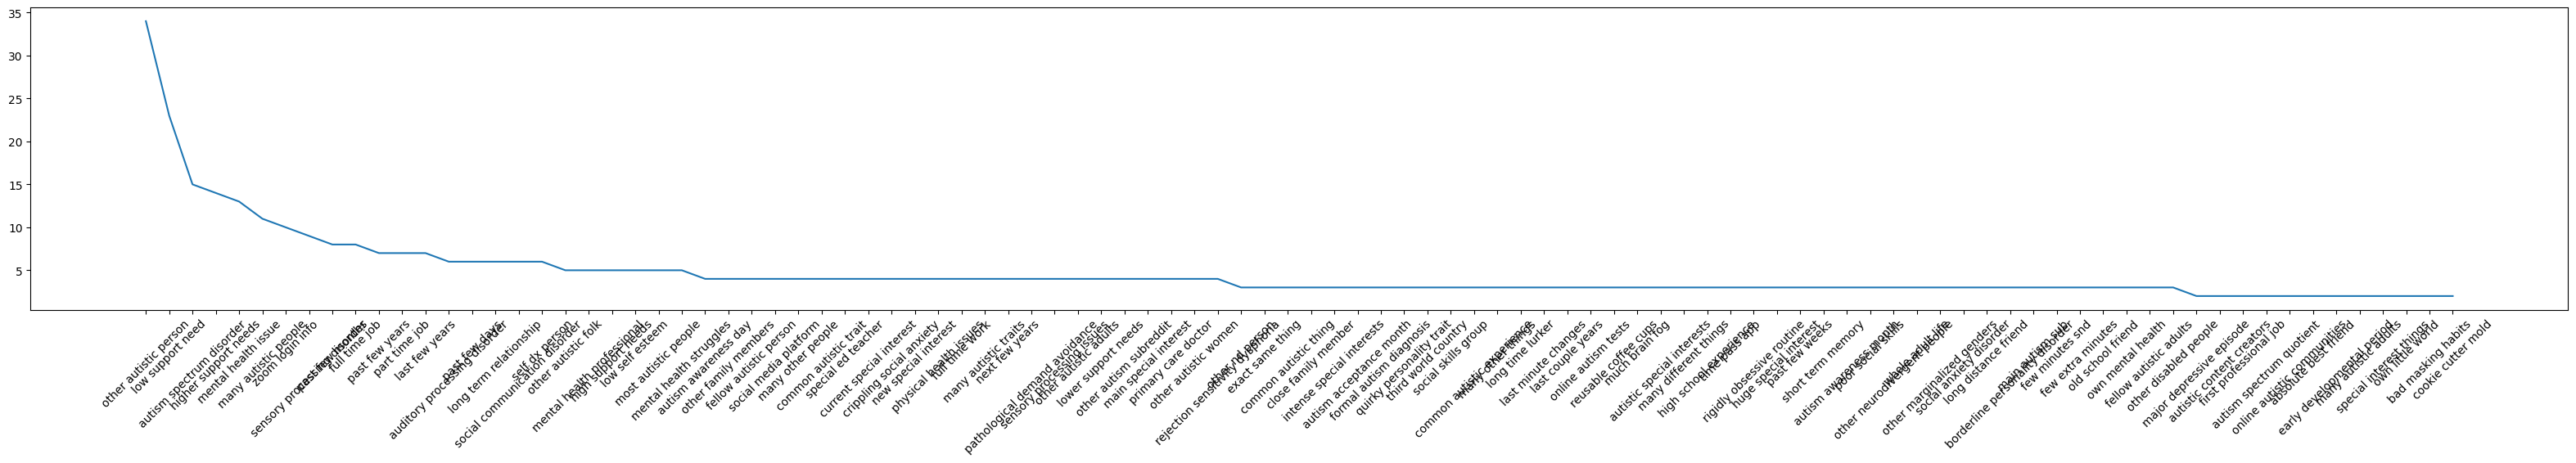

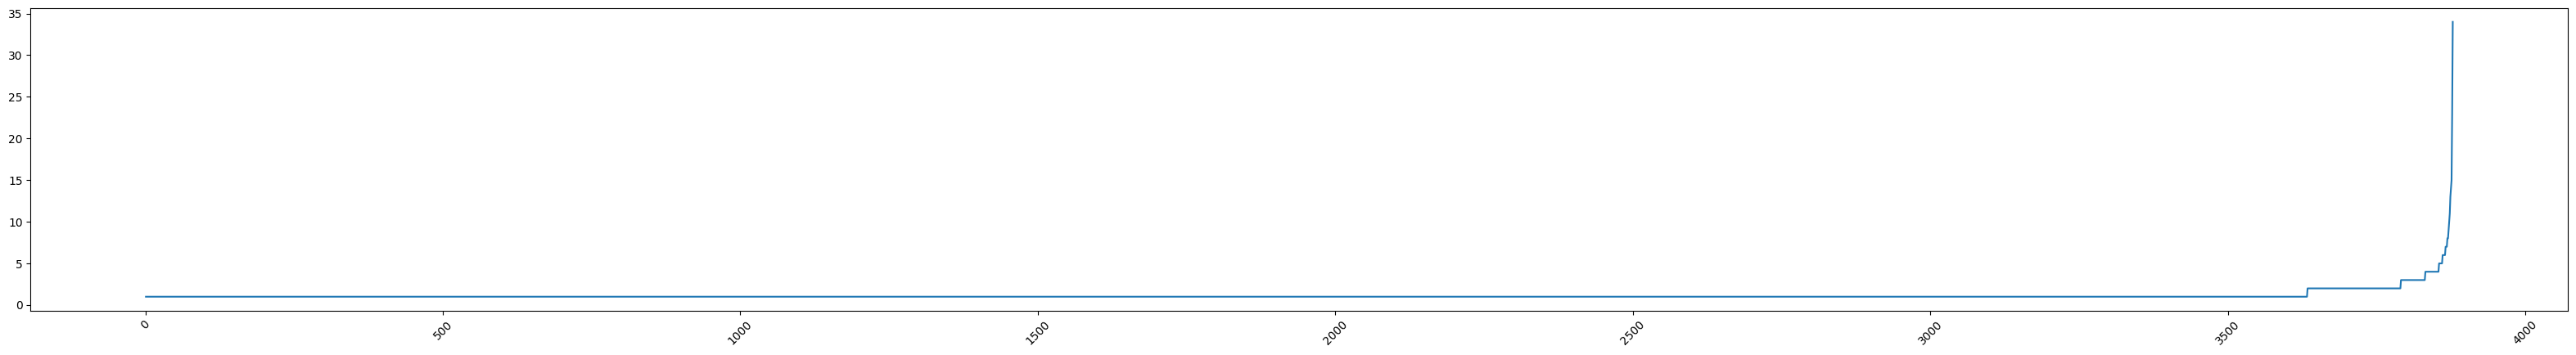

In [6]:
import matplotlib.pyplot as plt

# determining upper limit

queries = queries.sort_values(ascending=False, by='num_posts')
trigrams = queries.loc[queries['ngram']==3]
# print(len(unigrams))
df = trigrams.head(100)
# df = unigrams

plt.figure().set_figwidth(40)
plt.plot(df["query"], df["num_posts"])
# plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Frequency of 100 most common trigrams - total number: {}".format(len(trigrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/trigram_freq_desc.pdf", dpi=300, bbox_inches='tight')
plt.show()

# determining lower limit

queries = queries.sort_values(ascending=True, by='num_posts')
trigrams = queries.loc[queries['ngram']==3]
# print(len(unigrams))
df = trigrams.head(4000)
# df = unigrams

plt.figure().set_figwidth(40)
# plt.plot(df["query"], df["num_posts"])
plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Ascending order of Frequency of trigrams - total number: {}".format(len(trigrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/trigram_freq_asc.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [39]:
removed_trigrams = trigrams.loc[trigrams["num_posts"]>=10]
print(removed_trigrams)

                          query  ...                                           forms
27103           zoom login info  ...                               {zoom login info}
26992      many autistic people  ...                          {many autistic people}
26152       mental health issue  ...     {mental health issue, mental health issues}
26237      higher support needs  ...                          {higher support needs}
28109  autism spectrum disorder  ...                      {autism spectrum disorder}
27838          low support need  ...           {low support needs, low support need}
24654     other autistic person  ...  {other autistic person, other autistic people}

[7 rows x 5 columns]


In [40]:
dedicated_trigrams = ["mental health issue", "higher support needs", "autism spectrum disorder", "low support need"]
dedicated_trigrams_df = trigrams.loc[trigrams["query"].isin(dedicated_trigrams)]

final_trigrams = trigrams.loc[trigrams["num_posts"]>1].loc[trigrams["num_posts"]<10]

final_trigrams_list = pd.concat([final_trigrams, dedicated_trigrams_df], ignore_index=True)
final_trigrams_list = final_trigrams_list.sort_values(ascending=False, by="num_posts").reset_index(drop=True)

print(len(trigrams), len(final_trigrams_list))
final_trigrams_list.head()

3878 242


,query,ngram,num_occur,num_posts,forms
0,low support need,3,29,23,"{low support needs, low support need}"
1,autism spectrum disorder,3,22,15,{autism spectrum disorder}
2,higher support needs,3,16,14,{higher support needs}
3,mental health issue,3,14,13,"{mental health issue, mental health issues}"
4,sensory processing disorder,3,11,9,{sensory processing disorder}


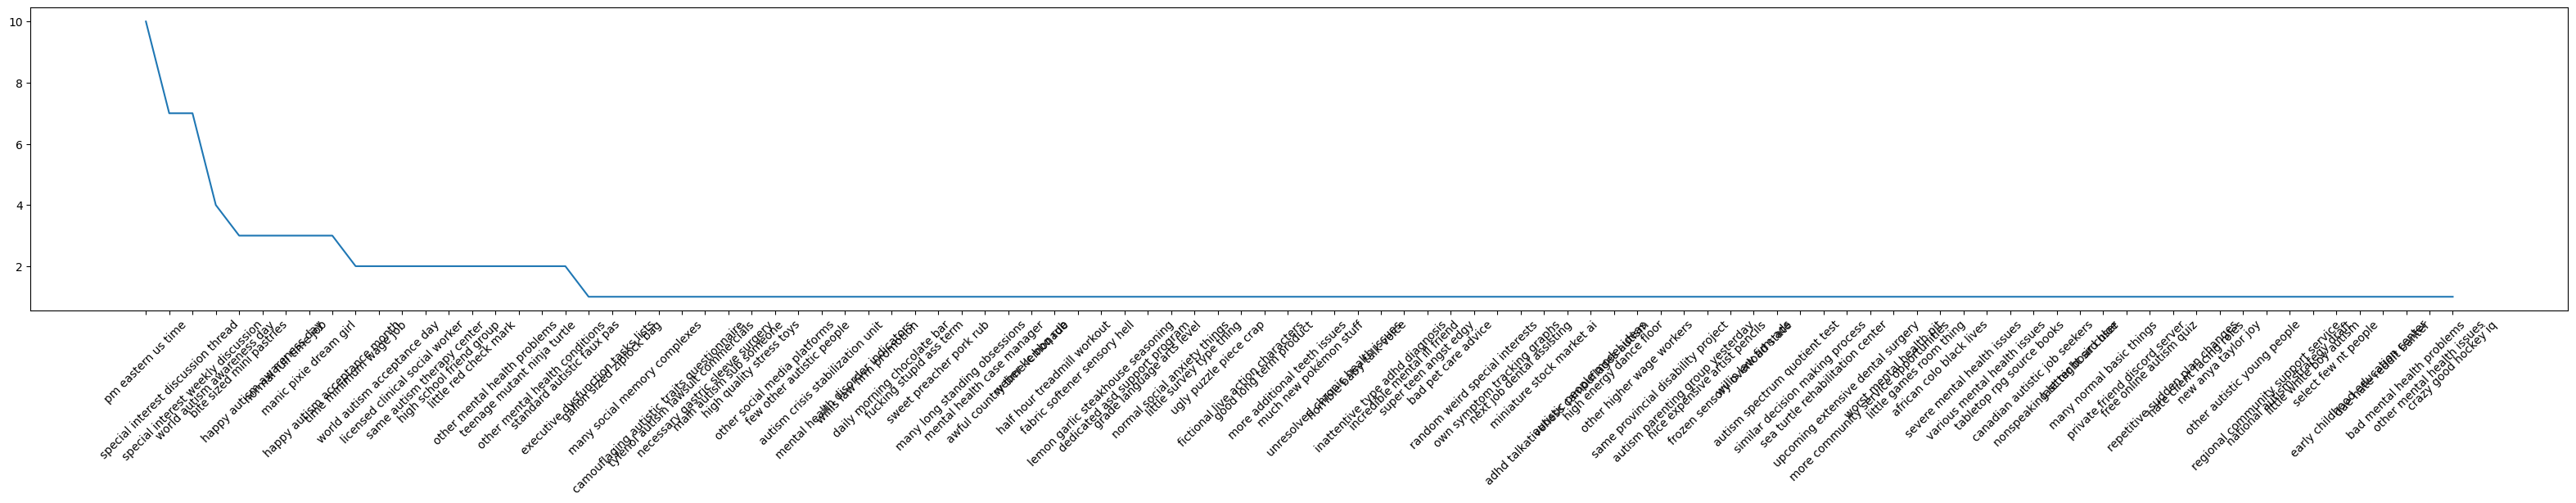

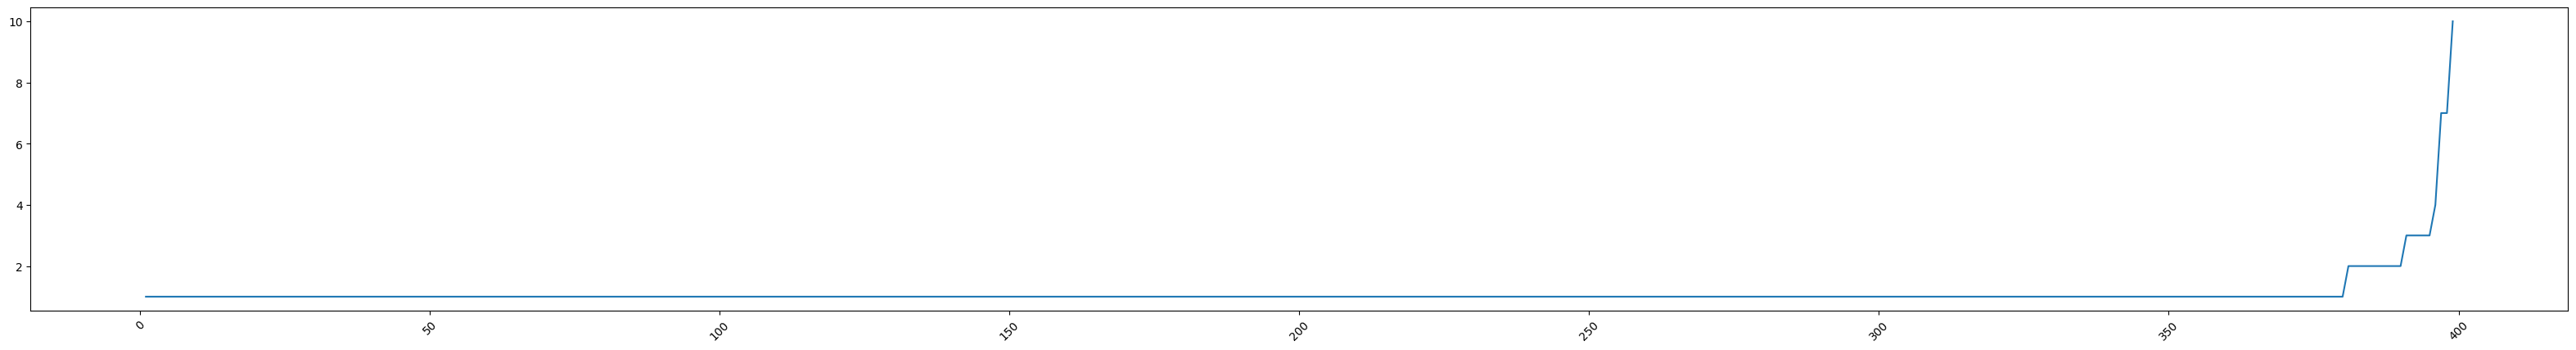

In [7]:
import matplotlib.pyplot as plt

# determining upper limit

queries = queries.sort_values(ascending=False, by='num_posts')
quadgrams = queries.loc[queries['ngram']==4]
# print(len(unigrams))
df = quadgrams.head(100)
# df = unigrams

plt.figure().set_figwidth(40)
plt.plot(df["query"], df["num_posts"])
# plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Frequency of 100 most common quadgrams - total number: {}".format(len(quadgrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/quadgram_freq_desc.pdf", dpi=300, bbox_inches='tight')
plt.show()

# determining lower limit

queries = queries.sort_values(ascending=True, by='num_posts')
quadgrams = queries.loc[queries['ngram']==4]
# print(len(unigrams))
df = quadgrams.head(400)
# df = unigrams

plt.figure().set_figwidth(40)
# plt.plot(df["query"], df["num_posts"])
plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Ascending order of Frequency of quadgrams - total number: {}".format(len(quadgrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/quadgram_freq_asc.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [42]:
removed_quadgrams = quadgrams.loc[quadgrams["num_posts"]>=4]
print(removed_quadgrams)

                                    query  ...                                 forms
28653          world autism awareness day  ...          {world autism awareness day}
28439  special interest weekly discussion  ...  {special interest weekly discussion}
28360  special interest discussion thread  ...  {special interest discussion thread}
28645                  pm eastern us time  ...                  {pm eastern us time}

[4 rows x 5 columns]


In [43]:
dedicated_quadgrams = ["world autism awareness day"]
dedicated_quadgrams_df = quadgrams.loc[quadgrams["query"].isin(dedicated_quadgrams)]

final_quadgrams = quadgrams.loc[quadgrams["num_posts"]>1].loc[quadgrams["num_posts"]<4]

final_quadgrams_list = pd.concat([final_quadgrams, dedicated_quadgrams_df], ignore_index=True)
final_quadgrams_list = final_quadgrams_list.sort_values(ascending=False, by="num_posts").reset_index(drop=True)

print(len(quadgrams), len(final_quadgrams_list))
final_quadgrams_list.head()

399 16


,query,ngram,num_occur,num_posts,forms
0,world autism awareness day,4,4,4,{world autism awareness day}
1,normal full time job,4,3,3,{normal full time job}
2,manic pixie dream girl,4,3,3,{manic pixie dream girl}
3,happy autism awareness day,4,3,3,{happy autism awareness day}
4,bite sized mini pastries,4,3,3,{bite sized mini pastries}


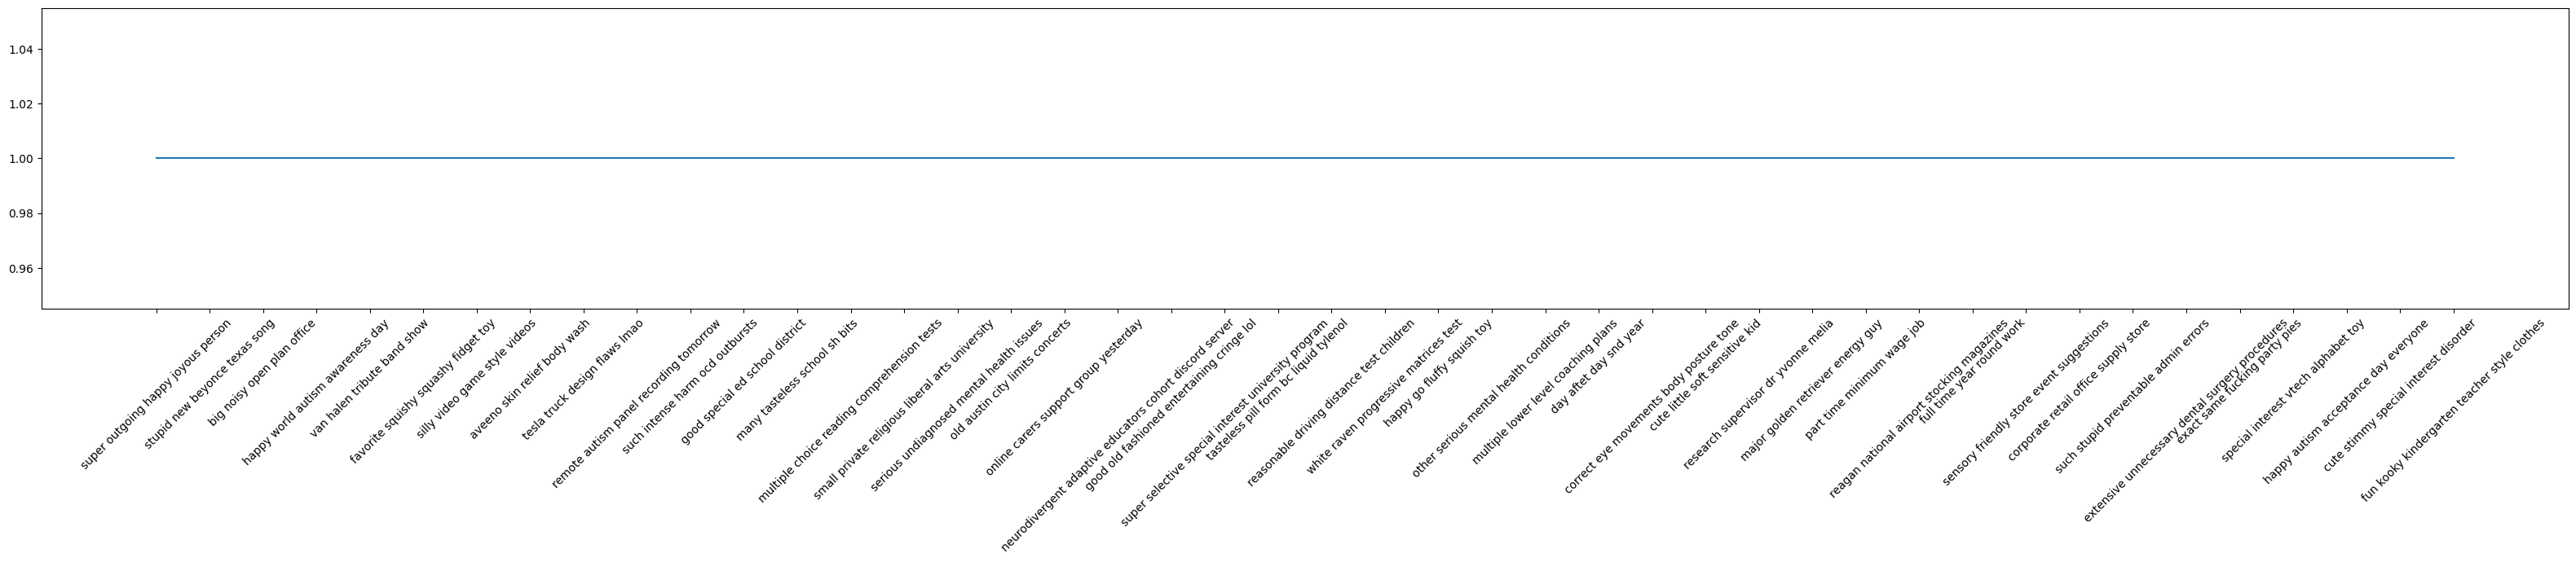

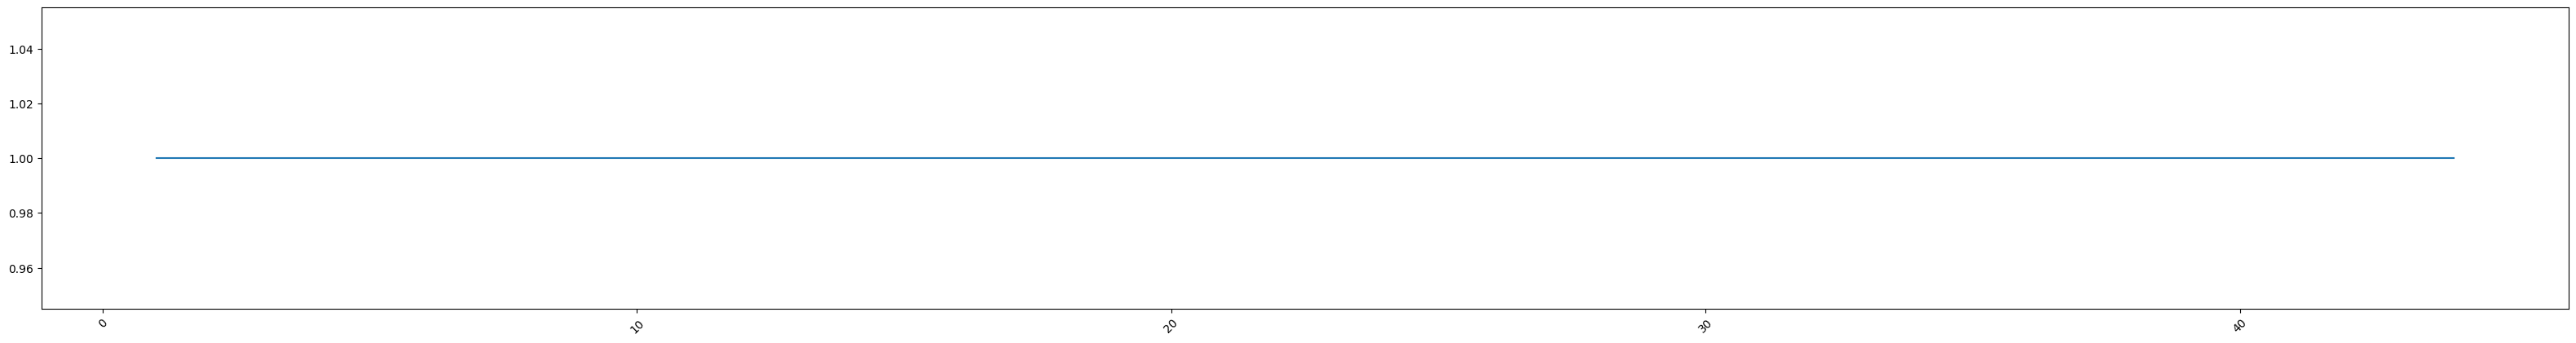

In [8]:
import matplotlib.pyplot as plt

# determining upper limit

queries = queries.sort_values(ascending=False, by='num_posts')
ngrams = queries.loc[queries['ngram']>4]
# print(len(unigrams))
df = ngrams.head(100)
# df = unigrams

plt.figure().set_figwidth(40)
plt.plot(df["query"], df["num_posts"])
# plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Frequency of 100 most common ngrams (n>4) - total number: {}".format(len(ngrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/ngram_freq_desc.pdf", dpi=300, bbox_inches='tight')
plt.show()

# determining lower limit

queries = queries.sort_values(ascending=True, by='num_posts')
ngrams = queries.loc[queries['ngram']>4]
# print(len(unigrams))
df = ngrams.head(400)
# df = unigrams

plt.figure().set_figwidth(40)
# plt.plot(df["query"], df["num_posts"])
plt.plot(range(1,len(df)+1), df["num_posts"])
# plt.title("Ascending order of Frequency of ngrams (n>4) - total number: {}".format(len(ngrams)))
plt.xticks(rotation = 45)
plt.savefig("../figures/appendix/ngram_freq_asc.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
ngrams

,query,ngram,num_occur,num_posts,forms
28783,fun kooky kindergarten teacher style clothes,6,1,1,{fun kooky kindergarten teacher style clothes}
28755,happy world autism awareness day,5,1,1,{happy world autism awareness day}
28756,big noisy open plan office,5,1,1,{big noisy open plan office}
28757,stupid new beyonce texas song,5,1,1,{stupid new beyonce texas song}
28758,super outgoing happy joyous person,5,1,1,{super outgoing happy joyous person}
28744,online carers support group yesterday,5,1,1,{online carers support group yesterday}
28782,neurodivergent adaptive educators cohort disco...,6,1,1,{neurodivergent adaptive educators cohort disc...
28781,good old fashioned entertaining cringe lol,6,1,1,{good old fashioned entertaining cringe lol}
28780,super selective special interest university pr...,6,1,1,{super selective special interest university p...
28779,tasteless pill form bc liquid tylenol,6,1,1,{tasteless pill form bc liquid tylenol}


In [18]:
# dedicated_words = ["autism", "autistic", "adhd", "mental health", "audhd", "sensory"]
dedicated_words = dedicated_unigrams + dedicated_bigrams + dedicated_trigrams + dedicated_quadgrams

def check_if_dedicated(text):
    for dedicated_word in dedicated_words:
        if dedicated_word in text:
            return True
    return False

idxs = [idx for idx, row in ngrams.iterrows() if check_if_dedicated(row["query"])==False]
final_ngrams_list = ngrams.drop(idxs)
print(len(ngrams), len(final_ngrams_list))
final_ngrams_list.head()

44 8


,query,ngram,num_occur,num_posts,forms
28755,happy world autism awareness day,5,1,1,{happy world autism awareness day}
28780,super selective special interest university pr...,6,1,1,{super selective special interest university p...
28775,full time year round work,5,1,1,{full time year round work}
28746,serious undiagnosed mental health issues,5,1,1,{serious undiagnosed mental health issues}
28751,remote autism panel recording tomorrow,5,1,1,{remote autism panel recording tomorrow}


In [20]:
final_query_list = pd.concat([final_unigrams_list, final_bigrams_list, final_trigrams_list, final_quadgrams_list, final_ngrams_list])
# del final_query_list['index']
print(len(queries), len(final_query_list))

28784 7146


In [21]:
final_query_list.head()

,query,ngram,num_occur,num_posts,forms
0,autism,1,2512,1222,{autism}
1,diagnosis,1,814,410,{diagnosis}
2,work,1,797,407,"{work, works}"
3,adhd,1,614,381,{adhd}
4,job,1,692,378,"{job, jobs}"


In [22]:
final_query_list = final_query_list.reset_index(drop=True)
final_query_list.to_excel("../Data/FinalQueries.xlsx", index=False)

## N-gram distribution

In [31]:
google_top_searches = pd.read_csv("../data/topQueries_Google.csv")
google_top_searches

,query,top/rising,score
0,google,top,100
1,youtube,top,88
2,you,top,79
3,weather,top,65
4,facebook,top,59
5,translate,top,53
6,whatsapp,top,50
7,amazon,top,40
8,instagram,top,40
9,news,top,35


In [32]:
import spacy

nlp = spacy.load('en_core_web_sm')
ngrams = []
for _, row in google_top_searches.iterrows():
    ngrams.append(len(nlp(row["query"])))

google_top_searches["ngram"] = ngrams

In [33]:
# Google trends 2023-2024

google_unigram_percent = len(google_top_searches.loc[google_top_searches["ngram"]==1])/len(google_top_searches)
google_bigram_percent = len(google_top_searches.loc[google_top_searches["ngram"]==2])/len(google_top_searches)
google_trigram_percent = len(google_top_searches.loc[google_top_searches["ngram"]==3])/len(google_top_searches)
google_quadgram_percent = len(google_top_searches.loc[google_top_searches["ngram"]==4])/len(google_top_searches)
google_ngram_percent = len(google_top_searches.loc[google_top_searches["ngram"]>4])/len(google_top_searches)

print(google_unigram_percent, google_bigram_percent, google_trigram_percent, google_quadgram_percent, google_ngram_percent)

0.84 0.12 0.04 0.0 0.0


In [6]:
# Ashlee - 2021
# yahoo webscope (https://webscope.sandbox.yahoo.com/catalog.php?datatype=l) - 2009


ashlee_unigram_percent = round(1200/4418,4)
yahoo_webscope_unigram_percent = round(1211/4458,4)
print(ashlee_unigram_percent, yahoo_webscope_unigram_percent)

0.2716 0.2716


In [23]:
# Taghavi et al: Analysis of Web Proxy 2012

unigram_percent_taghavi = 0.1519
bigram_percent_taghavi = 0.2826
trigram_percent_taghavi = 0.2554
quadgram_percent_taghavi = 0.1519
ngrams_percent_taghavi = round(1 - (unigram_percent_taghavi + bigram_percent_taghavi + trigram_percent_taghavi + quadgram_percent_taghavi),4)

In [4]:
# Yahoo webscope Jan 2009

import pandas as pd
import re

yahoo_queries = []

f = open("../data/YahooWebScope/L13/ydata-ysearch-tinysample-v1_0.txt")
for line in f.readlines():
    query = re.sub("\\n", "", line)
    yahoo_queries.append([query, len(query.split())])
f.close()

yahoo_df = pd.DataFrame(yahoo_queries, columns=["query", "ngram"])
yahoo_df.to_excel("../data/YahooWebScope/L13/yahoo_queries.xlsx", index=False)
yahoo_df.head()

,query,ngram
0,"""Miniatur Wunderland Hamburg""",3
1,"""Security",1
2,"""kimberly petrovic""",2
3,"""portage community schools""",3
4,"""puerto rico""",2


In [3]:
import pandas as pd

yahoo_df = pd.read_excel("../data/YahooWebScope/L13/yahoo_queries.xlsx")
total = len(yahoo_df)
unigram_percent_yahoo = round(len(yahoo_df.loc[yahoo_df["ngram"]==1])/total, 4)
bigram_percent_yahoo = round(len(yahoo_df.loc[yahoo_df["ngram"]==2])/total, 4)
trigram_percent_yahoo = round(len(yahoo_df.loc[yahoo_df["ngram"]==3])/total, 4)
quadgram_percent_yahoo = round(len(yahoo_df.loc[yahoo_df["ngram"]==4])/total, 4)
ngram_percent_yahoo = round(len(yahoo_df.loc[yahoo_df["ngram"]>4])/total, 4)

print(unigram_percent_yahoo, bigram_percent_yahoo, trigram_percent_yahoo, quadgram_percent_yahoo, ngram_percent_yahoo)

0.2736 0.2731 0.2435 0.1239 0.0859


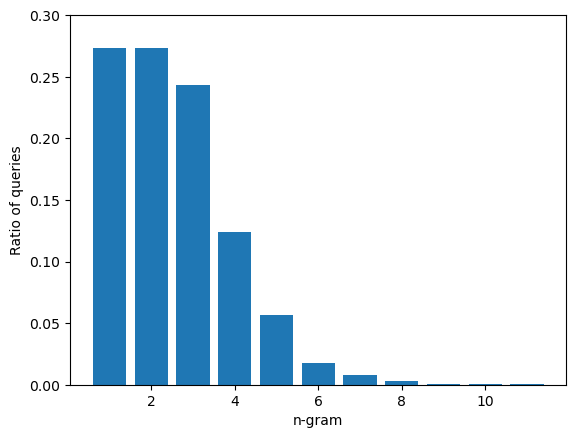

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

queries = pd.read_excel("../data/YahooWebScope/L13/yahoo_queries.xlsx")
ngrams = queries["ngram"].unique().tolist()
ratios = {int(ngram): len(queries.loc[queries['ngram']==ngram])/len(queries) for ngram in ngrams}

plt.bar(x=ratios.keys(), height=ratios.values())
# plt.title("Distribution of queries by n-gram length in \nYahoo! Search Query Tiny sample dataset")
plt.xlabel("n-gram")
plt.ylabel("Ratio of queries")
plt.ylim(0, 0.30)
plt.savefig("../figures/QueryStats/query_ngram_dist_yahoo.pdf", dpi=300)
plt.show()

In [4]:
unigram_percent = unigram_percent_yahoo
bigram_percent = bigram_percent_yahoo
trigram_percent = trigram_percent_yahoo
quadgram_percent = quadgram_percent_yahoo
ngram_percent = ngram_percent_yahoo

In [7]:
total_queries = 250

final_queries = pd.read_excel("../data/FinalQueries.xlsx")
queries = pd.read_excel("../data/CollectedQueries_3.xlsx")

num_unigrams = min(round(total_queries * unigram_percent), len(final_queries.loc[final_queries["ngram"]==1]))
num_bigrams = min(round(total_queries * bigram_percent), len(final_queries.loc[final_queries["ngram"]==2]))
num_trigrams = min(round(total_queries * trigram_percent), len(final_queries.loc[final_queries["ngram"]==3]))
num_quadgrams = min(round(total_queries * quadgram_percent), len(final_queries.loc[final_queries["ngram"]==4]))
num_ngrams = min(round(total_queries * ngram_percent), len(final_queries.loc[final_queries["ngram"]>4]))

print(num_unigrams, len(final_queries.loc[final_queries["ngram"]==1]))
print(num_bigrams, len(final_queries.loc[final_queries["ngram"]==2]))
print(num_trigrams, len(final_queries.loc[final_queries["ngram"]==3]))
print(num_quadgrams, len(final_queries.loc[final_queries["ngram"]==4]))
print(num_ngrams, len(final_queries.loc[final_queries["ngram"]>4]))
print(num_unigrams + num_bigrams + num_trigrams + num_quadgrams + num_ngrams)

68 3463
68 3417
61 242
16 16
8 8
221


In [8]:
more = total_queries - (num_unigrams + num_bigrams + num_trigrams + num_quadgrams + num_ngrams)
unigram_ratio = unigram_percent / (unigram_percent + bigram_percent + trigram_percent)
bigram_ratio = bigram_percent / (unigram_percent + bigram_percent + trigram_percent)
trigram_ratio = trigram_percent / (unigram_percent + bigram_percent + trigram_percent)

num_unigrams += round(unigram_ratio * more)
num_bigrams += round(bigram_ratio * more)
num_trigrams += round(trigram_ratio * more)

print(num_unigrams + num_bigrams + num_trigrams + num_quadgrams + num_ngrams)

250


In [9]:
print(round(num_unigrams/total_queries, 4))
print(round(num_bigrams/total_queries, 4))
print(round(num_trigrams/total_queries, 4))
print(round(num_quadgrams/total_queries, 4))
print(round(num_ngrams/total_queries, 4))

0.312
0.312
0.28
0.064
0.032


In [10]:
unigrams_ = final_queries.loc[final_queries["ngram"]==1].sort_values(ascending=False, by= "num_posts").iloc[range(0, num_unigrams)]
bigrams_ = final_queries.loc[final_queries["ngram"]==2].sort_values(ascending=False, by= "num_posts").iloc[range(0, num_bigrams)]
trigrams_ = final_queries.loc[final_queries["ngram"]==3].sort_values(ascending=False, by= "num_posts").iloc[range(0, num_trigrams)]
quadgrams_ = final_queries.loc[final_queries["ngram"]==4].sort_values(ascending=False, by= "num_posts").iloc[range(0, num_quadgrams)]
ngrams_ = final_queries.loc[final_queries["ngram"]>4].sort_values(ascending=False, by= "num_posts").iloc[range(0, num_ngrams)]

final_queries = pd.concat([unigrams_, bigrams_, trigrams_, quadgrams_, ngrams_])
print(len(queries), len(final_queries))

28846 250


In [11]:
final_queries.to_excel("../Data/SelectedQueries_2.xlsx", index=False)

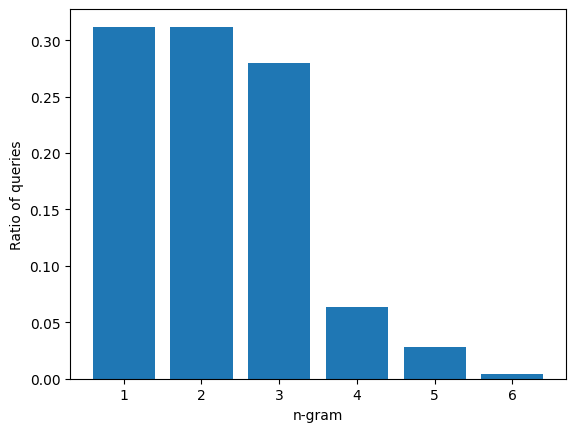

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

queries = pd.read_excel("../data/SelectedQueries_2.xlsx")
ngrams = queries["ngram"].unique().tolist()
ratios = {int(ngram): len(queries.loc[queries['ngram']==ngram])/len(queries) for ngram in ngrams}

plt.bar(x=ratios.keys(), height=ratios.values())
# plt.title("Distribution of queries by n-gram length")
plt.xlabel("n-gram")
plt.ylabel("Ratio of queries")
plt.savefig("../figures/QueryStats/query_ngram_dist.pdf", dpi=300)
plt.show()

## Autism Related Terms

In [21]:
from bs4 import BeautifulSoup
import urllib3
import re
import pandas as pd

response = urllib3.request("GET", "https://reframingautism.org.au/service/glossary-terms/")
soup = BeautifulSoup(response.data, "lxml")
# print(soup.prettify())
autism_terms = ["autism", "diagnosis"]
autism_terms += ["sensory issue", "special interest", "autistic person"]
autism_terms += ["mental health issue", "higher support needs", "autism spectrum disorder", "low support need"]
autism_terms += ["world autism awareness day"]

divs = soup.body.find_all("strong")
for div in divs:
    if div.parent.name == 'p' and div.parent.parent.name == 'div' and div.parent.parent['class'][0]=='text_content':
        phrase = div.text.strip()[:-1]
        terms = re.split("\(|\/", phrase)
        cleaned_terms = [term.strip().lower() for term in terms]
        if len(cleaned_terms) == 2 and cleaned_terms[1][-1] == ')':
            cleaned_terms[1] = cleaned_terms[1][:-1]
        autism_terms += cleaned_terms

df = pd.DataFrame(list(set(autism_terms)), columns=["terms"])
df.to_excel("../data/AutismGlossary.xlsx", index=False)

In [22]:
len(autism_terms)

178

In [23]:
queries = pd.read_excel("../data/SelectedQueries_2.xlsx")
autism_terms = pd.read_excel('../data/AutismGlossary.xlsx')['terms'].tolist()

domain_relevant = []

for query in queries["query"]:
    flag = 0
    for term in autism_terms:
        if term in query.split():
            print('"', query, '"', " matched with ", '"', term, '"')
            domain_relevant.append(True)
            flag = 1
            break
    if flag == 0:
        domain_relevant.append(False)

queries["domain_relevant"] = domain_relevant
print(queries.head())
queries.to_excel("../data/SelectedQueries_2.xlsx", index=False)

" autism "  matched with  " autism "
" diagnosis "  matched with  " diagnosis "
" adhd "  matched with  " adhd "
" meltdown "  matched with  " meltdown "
" autistic "  matched with  " autistic "
" autistic person "  matched with  " autistic "
" autistic trait "  matched with  " autistic "
" autistic woman "  matched with  " autistic "
" autism diagnosis "  matched with  " autism "
" official diagnosis "  matched with  " diagnosis "
" autistic adult "  matched with  " autistic "
" self diagnosis "  matched with  " diagnosis "
" neurotypical person "  matched with  " neurotypical "
" autistic burnout "  matched with  " burnout "
" formal diagnosis "  matched with  " diagnosis "
" autism thing "  matched with  " autism "
" autistic friend "  matched with  " autistic "
" autistic child "  matched with  " autistic "
" autism spectrum disorder "  matched with  " autism "
" most autistic people "  matched with  " autistic "
" other autistic folk "  matched with  " autistic "
" common autistic

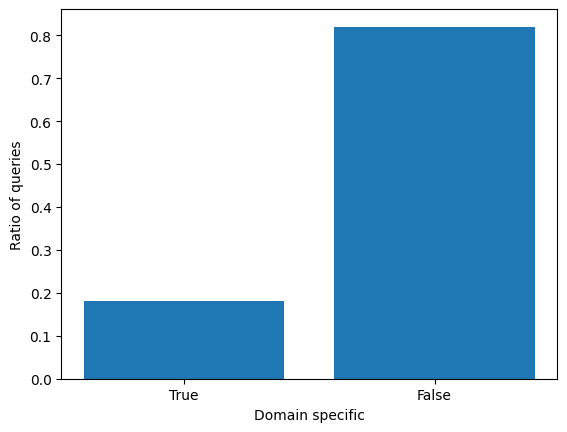

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

queries = pd.read_excel("../data/SelectedQueries_2.xlsx")
ngrams = queries["domain_relevant"].unique().tolist()
ratios = {str(ngram): len(queries.loc[queries['domain_relevant']==ngram])/len(queries) for ngram in ngrams}

plt.bar(list(ratios.keys()), list(ratios.values()))
# plt.title("Distribution of queries by domain specificity")
plt.xlabel("Domain specific")
plt.ylabel("Ratio of queries")
plt.savefig("../figures/QueryStats/query_domain_dist.pdf", dpi=300)
plt.show()

In [1]:
### control group queries

In [2]:
import pandas as pd
import random
random.seed(10)


control_queries = pd.read_excel("../data/YahooWebScope/L13/yahoo_queries.xlsx")
target_queries = pd.read_excel("../Data/SelectedQueries_2.xlsx")

ngram_counts = [(ngram, len(target_queries.loc[target_queries["ngram"]==ngram])) for ngram in target_queries["ngram"].unique()]
# control_queries.head()

control_final_queries = []

for ngram, count in ngram_counts:
    temp = control_queries.loc[control_queries["ngram"]==ngram]
    queries = temp["query"].tolist()
    temp_queries = random.sample(queries, k=count)
    if ngram > 4:
        ngram = ">4"
    for query in temp_queries:
        control_final_queries.append([query, ngram])

control_queries_df = pd.DataFrame(control_final_queries, columns=["query", "ngram"])
control_queries_df.to_excel("../Data/ControlQueries.xlsx", index=False)

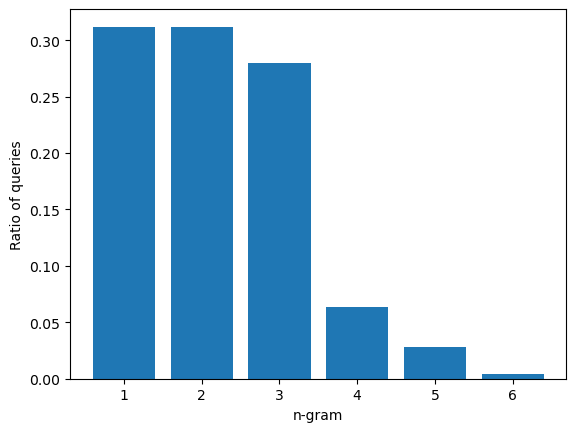

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

queries = pd.read_excel("../Data/ControlQueries.xlsx")
og_ngram = [len(query.split(" ")) for query in queries["query"]]
queries["og_ngram"] = og_ngram
ngrams = queries["og_ngram"].unique().tolist()
# ngrams
ratios = {}
for ngram in ngrams:
    num_queries = len(queries.loc[queries["og_ngram"]==ngram])
    ratio = num_queries/len(queries)
    ratios[ngram] = ratio

plt.bar(x=ratios.keys(), height=ratios.values())
# plt.title("Distribution of queries by n-gram length")
plt.xlabel("n-gram")
plt.ylabel("Ratio of queries")
plt.savefig("../figures/QueryStats/control_query_ngram_dist.pdf", dpi=300)
plt.show()